In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
liste_E = [50000] #[500, 1000, 3000]
liste_nu = [0.40] #[0.35, 0.41, 0.45] #[0.35, 0.41, 0.45]
g=20
rho_top = 20
h_top = 0.2
Pa = rho_top * g * h_top

In [3]:
def lire_points_MPM(E,nu, glocal):
    nom_fich = "MPM_top"  + "-E" + str(int(E)) + "-nu" + "{:.2f}".format(nu)+ "-rho" + str(int(rho_top))  + "-g" + str(int(glocal))+ ".res"
    f_MPM = open(nom_fich, "r")
    points_MPM_X = []
    points_MPM_Y = []
    lines_MPM = f_MPM.readlines()
    for line in lines_MPM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_MPM_X.append(float(liste_lue[0]))
        points_MPM_Y.append(float(liste_lue[1]))
    return points_MPM_X, points_MPM_Y

In [4]:
def lire_points_FEM(E,nu, glocal):
    nom_fich = "FEM_top"  + "-Pa" + str(int(Pa)) + "-g" + str(int(glocal))+ ".res"
    f_FEM = open(nom_fich, "r")
    points_FEM_X = []
    points_FEM_Y = []
    lines_FEM = f_FEM.readlines()
    for line in lines_FEM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_FEM_X.append(float(liste_lue[0]))
        points_FEM_Y.append(float(liste_lue[1]))
    return points_FEM_X, points_FEM_Y

In [5]:
def lire_points_ABAQUS(E,nu, glocal):
    #nom_fich = "ABAQUS-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(glocal))+ ".temoin"
    nom_fich = "ABAQUS_top"  + "-E" + str(int(E)) + "-nu" + "{:.2f}".format(nu)+ "-rho" + str(int(rho_top))  + "-g" + str(int(glocal))+ ".res"
    f_ABAQUS = open(nom_fich, "r")
    points_ABAQUS_X = []
    points_ABAQUS_Y = []
    lines_ABAQUS = f_ABAQUS.readlines()
    for line in lines_ABAQUS:
        lu = line   #[:-1]
        liste_lue = lu.split()         
        #print("lu 5:",liste_lue[5], " lu 6: ",liste_lue[6])
        points_ABAQUS_X.append(float(liste_lue[5]))
        points_ABAQUS_Y.append(float(liste_lue[6]))
    return points_ABAQUS_X, points_ABAQUS_Y

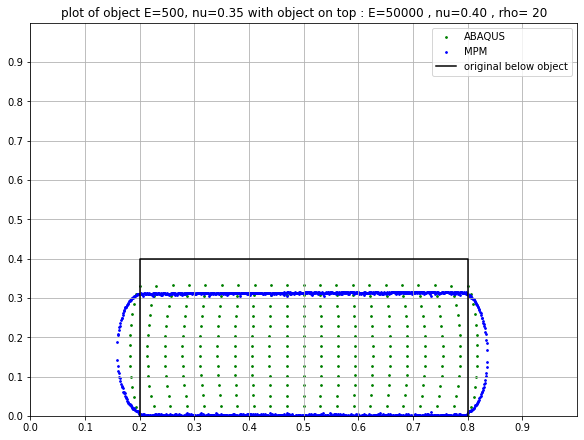

In [6]:
#fig, ax = plt.subplots(len(liste_E),len(liste_nu),figsize=(14, len(liste_E)*3), layout='constrained', squeeze=False)
#fig, ax = plt.subplots(3,3,figsize=(14, 3*3), layout='constrained', squeeze=False)
fig, ax = plt.subplots(1,1,figsize=(8, 6), layout='constrained', squeeze=False)
for i,E in enumerate(liste_E):
    if E==500:
        gparam = 15
    else:
        gparam = g
    for j,nu in enumerate(liste_nu):
#         points_FEM_X, points_FEM_Y = lire_points_FEM(E,nu, gparam)
#         ax[i,j].scatter(points_FEM_X, points_FEM_Y, color='red', s=3 , label ="FEM")         

        points_ABAQUS_X, points_ABAQUS_Y = lire_points_ABAQUS(E,nu, gparam)
        decalage_X= 0.0 #0.780   #0.66
        decalage_Y= 0.0 # 0.340   #0.0
        ax[i,j].scatter([x + decalage_X for x in points_ABAQUS_X], [y + decalage_Y for y in points_ABAQUS_Y], color='green', s=3, label ="ABAQUS" )

        points_MPM_X, points_MPM_Y = lire_points_MPM(E,nu, gparam)
        ax[i,j].scatter(points_MPM_X, points_MPM_Y, color='blue', s=3, label ="MPM" )

        ax[i,j].xaxis.set_ticks(np.arange(0, 1, 0.1))
        ax[i,j].yaxis.set_ticks(np.arange(0, 1, 0.1))
        ax[i,j].grid()
        
        ax[i,j].plot([0.2, 0.2, 0.8, 0.8], [0.0, 0.4, 0.4, 0.0], color = "black", label ="original below object")
        ax[i,j].set_xlim(0,1)
        ax[i,j].set_ylim(0,1)     
        ax[i,j].set_title("plot of object E=500, nu=0.35 with object on top : E=" + str(E) + " , " + "nu=" + "{:.2f}".format(nu) + " , rho= " + str(rho_top))
        ax[i,j].legend()

In [7]:
################################################

In [8]:
a=np.array([[1,2],[3,4],[5,6]])

In [9]:
a.shape

(3, 2)

In [10]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [11]:
rng = np.random.default_rng()

In [12]:
points = rng.random((30, 2))

In [13]:
points.shape

(30, 2)

In [14]:
hull = ConvexHull(points)

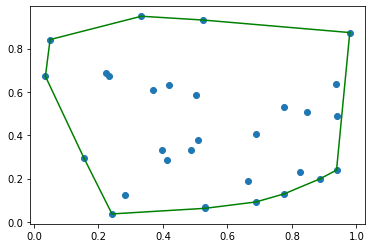

In [15]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g-')

In [16]:
hull.simplices

array([[15, 26],
       [11,  8],
       [11, 10],
       [ 3,  8],
       [ 3, 14],
       [23, 26],
       [23, 14],
       [19, 10],
       [19,  0],
       [24,  0],
       [22, 15],
       [22, 24]], dtype=int32)

In [17]:
help(hull)

Help on ConvexHull in module scipy.spatial.qhull object:

class ConvexHull(_QhullUser)
 |  ConvexHull(points, incremental=False, qhull_options=None)
 |  
 |  ConvexHull(points, incremental=False, qhull_options=None)
 |  
 |  Convex hulls in N dimensions.
 |  
 |  .. versionadded:: 0.12.0
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to construct a convex hull from
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual
 |      for details. (Default: "Qx" for ndim > 4 and "" otherwise)
 |      Option "Qt" is always enabled.
 |  
 |  Attributes
 |  ----------
 |  points : ndarray of double, shape (npoints, ndim)
 |      Coordinates of input points.
 |  vertices : ndarray of ints, shape (nvertices,)
 |      Indices of points forming the vertices of th

In [18]:
a=np.array([1,2,3])

In [19]:
a>0

array([ True,  True,  True])

In [20]:
#####################################################

In [21]:
from scipy.spatial import Delaunay

In [22]:
help(Delaunay)

Help on class Delaunay in module scipy.spatial.qhull:

class Delaunay(_QhullUser)
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay tessellation in N dimensions.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to triangulate
 |  furthest_site : bool, optional
 |      Whether to compute a furthest-site Delaunay triangulation.
 |      Default: False
 |  
 |      .. versionadded:: 0.12.0
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual for
 |      details. Option "Qt" is always enabled.
 |      Default:"Qbb Qc Qz Qx Q12" for ndim > 4 and "Qbb Qc Qz Q12" otherwise.
 |      Incremental

In [23]:
points_MPM= np.array([[points_MPM_X[i], points_MPM_Y[i]] for i in range(len(points_MPM_X))])
points_ABAQUS= np.array([[points_ABAQUS_X[i], points_ABAQUS_Y[i]] for i in range(len(points_ABAQUS_X))])

In [24]:
points_MPM[0]

array([0.15917969, 0.14089815])

In [25]:
hull_MPM = ConvexHull(points_MPM)
hull_ABAQUS = ConvexHull(points_ABAQUS)

In [26]:
min_X = min(points_MPM_X + points_ABAQUS_X)
max_X = max(points_MPM_X + points_ABAQUS_X)
min_Y = min(points_MPM_Y + points_ABAQUS_Y)
max_Y = max(points_MPM_Y + points_ABAQUS_Y)

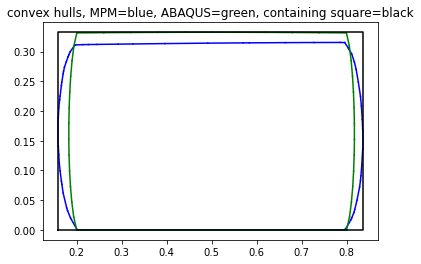

In [29]:
#plt.plot(points_res[:,0], points_res[:,1], 'o')
for simplex in hull_MPM.simplices:
    plt.plot(points_MPM[simplex, 0], points_MPM[simplex, 1], 'b-')
for simplex in hull_ABAQUS.simplices:
    plt.plot(points_ABAQUS[simplex, 0], points_ABAQUS[simplex, 1], 'g-') 
plt.plot([min_X,min_X,max_X,max_X,min_X], [min_Y,max_Y,max_Y,min_Y,min_Y], 'k-')
plt.title("convex hulls, MPM=blue, ABAQUS=green, containing square=black")
plt.show()

In [30]:
hull_MPM_D = Delaunay(points_MPM)
hull_ABAQUS_D = Delaunay(points_ABAQUS)

In [31]:
hull_ABAQUS_D.find_simplex([0.5,0.8]) 

array(-1, dtype=int32)

In [32]:
nbre_points_test = 100000
points_test = [[random.uniform(min_X, max_X),random.uniform(min_Y, max_Y)] for i in range(nbre_points_test)]

In [33]:
len(points_test)

100000

In [34]:
inside_MPM = hull_MPM_D.find_simplex(points_test) > 0
inside_ABAQUS = hull_ABAQUS_D.find_simplex(points_test) > 0

In [35]:
inside_ABAQUS

array([ True,  True,  True, ..., False,  True,  True])

In [36]:
in_intersection = len([i for i in range(nbre_points_test) if inside_MPM[i] and inside_ABAQUS[i]])
in_MPM_not_ABAQUS = len([i for i in range(nbre_points_test) if inside_MPM[i] and (not inside_ABAQUS[i])])
in_ABAQUS_not_MPM = len([i for i in range(nbre_points_test) if (not inside_MPM[i]) and inside_ABAQUS[i]])
in_MPM = len([i for i in range(nbre_points_test) if inside_MPM[i]])
in_ABAQUS = len([i for i in range(nbre_points_test) if inside_ABAQUS[i]])

In [37]:
print(in_intersection, in_MPM_not_ABAQUS, in_ABAQUS_not_MPM, in_MPM, in_ABAQUS)

87237 4237 4832 91474 92069


In [38]:
distance = (in_MPM_not_ABAQUS + in_ABAQUS_not_MPM) / in_intersection
distance

0.10395818288111695

In [39]:
DSC = 2*in_intersection / (in_MPM + in_ABAQUS)
DSC

0.9505892352200846